In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

%matplotlib inline

In [2]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [3]:
for path, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data'):
    print(path, dirs, files)

/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05 ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov [] ['data.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov [] ['data.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov [] ['data.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirno

In [174]:
root_dir = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/4/data'
all_files = [] # список для хранения путей до всех csv-файлов

# рекурсивно проходим по всем папкам и получаем список csv-файлов
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            k = file_path.split('/') # разделяем получившийся путь по '/', в итоге получим список ['....', 'Petr_Ivanov', 'data.csv']
            df = pd.read_csv(file_path)
            df['name'] = k[-2]              # создаем колонку с именем папки (имя пользователя)
            df['date'] = k[-3]              # создаем колонку с именем папки (дата)
            
            all_files.append(df)
            
# объединяем все датафреймы в один
final_df = pd.concat(all_files, ignore_index=True)

In [175]:
final_df

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [45]:
sum = final_df['quantity'].sum()

In [74]:
sum

480

In [123]:
final_df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending = False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [126]:
top_10 = final_df.groupby('product_id', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False).head(10)

In [127]:
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


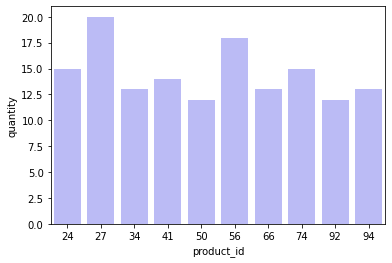

In [135]:
sns.barplot(x='product_id', y='quantity', data=top_10, color = 'blue', alpha = 0.3)

In [152]:
top_10_by_day = final_df.groupby('date', as_index = False).agg({'quantity':'sum'}).sort_values('date', ascending = True).head(10)

In [153]:
top_10_by_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


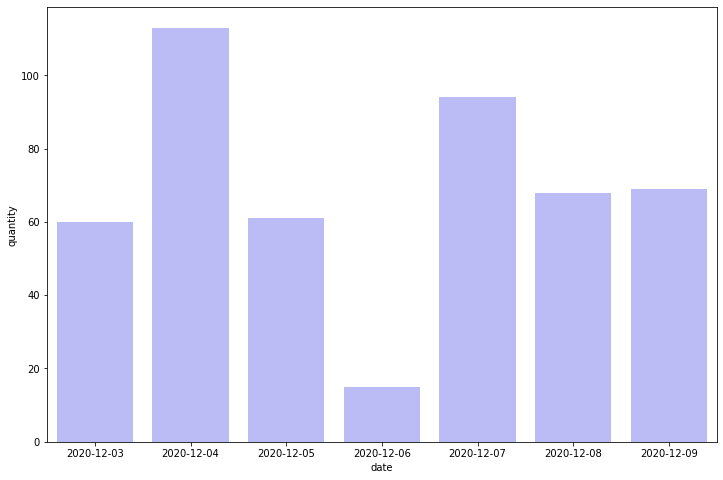

In [154]:
plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='quantity', data = top_10_by_day, color = 'blue', alpha = 0.3)

In [176]:
final_df_dublicate_product = final_df.loc[final_df.duplicated('product_id')]

In [177]:
final_df_dublicate_product

,Unnamed: 0,product_id,quantity,name,date
12,0,66,2,Kirill_Smirnov,2020-12-05
20,0,41,4,Alexey_Petrov,2020-12-05
22,2,33,1,Alexey_Petrov,2020-12-05
23,0,89,4,Petr_Petrov,2020-12-08
25,2,13,1,Petr_Petrov,2020-12-08
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [180]:
final_df_dublicate_product_and_name = final_df_dublicate_product.loc[final_df_dublicate_product.duplicated('name')]

In [181]:
final_df_dublicate_product_and_name

,Unnamed: 0,product_id,quantity,name,date
22,2,33,1,Alexey_Petrov,2020-12-05
25,2,13,1,Petr_Petrov,2020-12-08
31,3,27,5,Rostislav_Petrov,2020-12-08
32,4,32,3,Rostislav_Petrov,2020-12-08
33,5,50,5,Rostislav_Petrov,2020-12-08
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [236]:
final_df_dublicate_product_and_name.groupby(['name', 'product_id']).agg({'product_id': 'count'}).query('product_id > 1')

,,product_id
name,product_id,
Alexey_Smirnov,55,2
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [191]:
for i in final_df_dublicate_product_and_name['name']:
    o = final_df_dublicate_product_and_name.query('name == "{}"'.format(i)).value_counts('date')
    print (o)

date
2020-12-05    1
dtype: int64
date
2020-12-08    1
dtype: int64
date
2020-12-08    3
2020-12-09    2
dtype: int64
date
2020-12-08    3
2020-12-09    2
dtype: int64
date
2020-12-08    3
2020-12-09    2
dtype: int64
date
2020-12-07    4
2020-12-08    3
2020-12-09    1
dtype: int64
date
2020-12-07    4
2020-12-08    3
2020-12-09    1
dtype: int64
date
2020-12-07    4
2020-12-08    3
2020-12-09    1
dtype: int64
date
2020-12-04    4
2020-12-03    3
2020-12-09    2
2020-12-07    2
dtype: int64
date
2020-12-04    4
2020-12-03    3
2020-12-09    2
2020-12-07    2
dtype: int64
date
2020-12-08    3
2020-12-09    2
dtype: int64
date
2020-12-08    3
2020-12-09    2
dtype: int64
date
2020-12-07    4
2020-12-08    3
2020-12-09    1
dtype: int64
date
2020-12-09    2
2020-12-07    1
dtype: int64
date
2020-12-09    2
2020-12-07    1
dtype: int64
date
2020-12-07    2
2020-12-04    2
dtype: int64
date
2020-12-07    2
2020-12-04    2
dtype: int64
date
2020-12-04    4
2020-12-03    3
2020-12-09    2
2

In [184]:
final_df_dublicate_product_and_name.value_counts('date')

date
2020-12-07    29
2020-12-04    14
2020-12-03    11
2020-12-09     7
2020-12-08     7
2020-12-06     1
2020-12-05     1
dtype: int64

In [237]:
final_df_without_dubl = final_df.drop_duplicates(['name', 'date', 'product_id'])

In [239]:
final_df_without_dubl

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [240]:
n = final_df_without_dubl.groupby(['name', 'product_id']).agg({'product_id': 'count'})

In [241]:
n

product_id
name           product_id            
Alexey_Fedorov 13                   1
               15                   1
               18                   1
               34                   1
               50                   1
...                               ...
Vasiliy_Ivanov 83                   1
               94                   1
               95                   1
Vasiliy_Petrov 27                   1
               78                   1

[158 rows x 1 columns]

In [242]:
n.query('product_id > 1').describe()

,product_id
count,2.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0
